### Import dependencies and load the data file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as st


In [2]:
trips_file = "Trips_by_Distance4.csv"
trips_df = pd.read_csv(trips_file).dropna(how='any')
trips_df

,County Name,2019,2020,2021
0,Atlantic,"2,636,501","2,812,601",369599
1,Bergen,"9,584,850","9,511,333",1226050
2,Burlington,"4,620,085","4,688,496",608068
3,Camden,"5,052,202","5,171,437",671189
4,Cape,"887,893","934,542",120929
5,Cumberland,"1,535,809","1,656,905",217614
6,Essex,"7,735,418","7,998,381",1047233
7,Gloucester,"3,026,146","3,126,291",403143
8,Hudson,"6,213,346","6,200,327",794389
9,Hunterdon,"1,354,015","1,383,523",176547


### Data cleanup

#### Convert strings to integers so that column values and be calcuated

In [3]:
#trips_df.columns

colstoclean = ['2019',
       '2020']
for col in colstoclean:
    print(col)
    trips_df[col] = trips_df[col].str.replace(",","").astype(int)

2019
2020


In [4]:
# Confirm all numerics are now integers
trips_df.head()

,County Name,2019,2020,2021
0,Atlantic,2636501,2812601,369599
1,Bergen,9584850,9511333,1226050
2,Burlington,4620085,4688496,608068
3,Camden,5052202,5171437,671189
4,Cape,887893,934542,120929


## Charts and Graphs

In [5]:

#trips_df['2020'] = pd.to_numeric(trips_df['2020'])

In [6]:
trips_df['2019'] = pd.to_numeric(trips_df['2019'])
trips_df['2020'] = pd.to_numeric(trips_df['2020'])
trips_df['2021'] = pd.to_numeric(trips_df['2021'])

Text(0.5, 1.0, 'Changes in Mobility - Staying at Home')

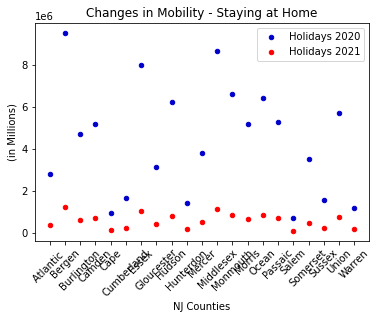

In [11]:
ax = trips_df.plot.scatter(x='County Name',y='2020',label='Holidays 2020',color='mediumblue')
trips_df.plot.scatter(x='County Name',y='2021', label='Holidays 2021',color='red',rot=45,ax=ax)

plt.xticks(np.arange(0,len(trips_df['County Name'])),rotation=45)
plt.ylabel("(in Millions)")
plt.xlabel("NJ Counties")
plt.title("Changes in Mobility - Staying at Home")


Text(0.5, 1.0, 'Mobility Changes during the Nov-Dec Holiday travel period')

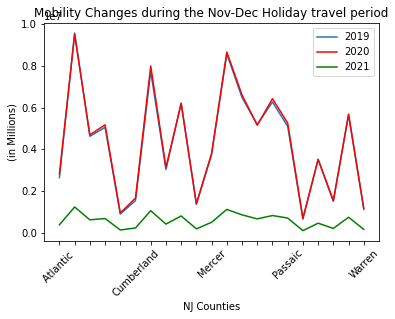

In [15]:
ax2 = trips_df.plot(kind='line',x='County Name',y='2019',label='2019')
trips_df.plot(kind='line',x='County Name',y='2020',label='2020', color='red',ax=ax2)
trips_df.plot(kind='line',x='County Name',y='2021',label='2021',color='green',ax=ax2)

#f = plt.figure() 
#f.set_figwidth(5) 
#f.set_figheight(1)
plt.xticks(np.arange(0,len(trips_df['County Name']),),rotation=45)
plt.ylabel("(in Millions)")
plt.xlabel("NJ Counties")
plt.title("Mobility Changes during the Nov-Dec Holiday travel period")